# Multiple Linear Regression
## Banglore house price prediction

#### Problem Statement:

Predicting house price based on the different factors.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Step 2: Data preparation and Visualising

Let's now spend some time doing what is arguably the most important step - **preparing the data**.
- Let us also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [7]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

Here, availability contains two string values "Ready to move" and "Immediate possession". We can replace this with current date.

In [8]:
data.loc[data["availability"] == "Ready To Move", "availability"] = "23-Jul"

In [9]:
data.availability.unique()

array(['19-Dec', '23-Jul', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
data.loc[data["availability"] == "Immediate Possession", "availability"] = "23-Jul"

In [11]:
data.availability.unique()

array(['19-Dec', '23-Jul', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [12]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,23-Jul,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,23-Jul,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,23-Jul,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,23-Jul,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
data["availability_date"]=data["availability"].apply(lambda x: int(x.split("-")[0]))

In [14]:
data["availability_month"]=data["availability"].apply(lambda x: x.split("-")[1])

In [15]:
data.drop(["availability"],axis=1,inplace=True)

In [16]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,availability_date,availability_month
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,19,Dec
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,23,Jul
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,23,Jul
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,23,Jul
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,23,Jul


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  object 
 1   location            13319 non-null  object 
 2   size                13304 non-null  object 
 3   society             7818 non-null   object 
 4   total_sqft          13320 non-null  object 
 5   bath                13247 non-null  float64
 6   balcony             12711 non-null  float64
 7   price               13320 non-null  float64
 8   availability_date   13320 non-null  int64  
 9   availability_month  13320 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


Clearly, society column has almost 50% null values and some other columns have around 5% null values. 
So let us remove society column and remove rows containing null values.

In [18]:
data.drop(["society"],axis=1,inplace=True)

In [19]:
data.dropna(inplace=True)

In [20]:
data.shape

(12710, 9)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           12710 non-null  object 
 1   location            12710 non-null  object 
 2   size                12710 non-null  object 
 3   total_sqft          12710 non-null  object 
 4   bath                12710 non-null  float64
 5   balcony             12710 non-null  float64
 6   price               12710 non-null  float64
 7   availability_date   12710 non-null  int64  
 8   availability_month  12710 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 993.0+ KB


In [22]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

We can derive a numerical column using "size" as follows

In [23]:
data["no_of_bedrooms"]=data["size"].apply(lambda x:int(x.split(" ")[0]))

In [24]:
data.drop(["size"],axis=1,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           12710 non-null  object 
 1   location            12710 non-null  object 
 2   total_sqft          12710 non-null  object 
 3   bath                12710 non-null  float64
 4   balcony             12710 non-null  float64
 5   price               12710 non-null  float64
 6   availability_date   12710 non-null  int64  
 7   availability_month  12710 non-null  object 
 8   no_of_bedrooms      12710 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 993.0+ KB


In [26]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,availability_date,availability_month,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,19,Dec,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,23,Jul,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,23,Jul,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,23,Jul,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,23,Jul,2


In [27]:
len(data.total_sqft.unique())

1976

Let us convert total_sqft to numerical. We cabn find units in sqft, let us convert them to single unit.

In [28]:
def convert(x):
    if "Sq. Meter" in x:
        return float(x.replace("Sq. Meter","").strip())*10.7
    if "Acres" in x:
        return float(x.replace("Acres","").strip())*43560
    if "Sq. Yards" in x:
        return float(x.replace("Sq. Yards","").strip())*9
    if "Cents" in x:
        return float(x.replace("Cents","").strip())*435.6
    if "Guntha" in x:
        return float(x.replace("Guntha","").strip())*1089
    if "Grounds" in x:
        return float(x.replace("Grounds","").strip())*2400
    str_arr=x.split("-")
    int_arr = [float(p.strip()) for p in str_arr]
    return sum(int_arr)/len(int_arr)

data["total_sqft"]=data["total_sqft"].apply(convert)

In [29]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,availability_date,availability_month,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,19,Dec,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,23,Jul,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,23,Jul,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,23,Jul,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,23,Jul,2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           12710 non-null  object 
 1   location            12710 non-null  object 
 2   total_sqft          12710 non-null  float64
 3   bath                12710 non-null  float64
 4   balcony             12710 non-null  float64
 5   price               12710 non-null  float64
 6   availability_date   12710 non-null  int64  
 7   availability_month  12710 non-null  object 
 8   no_of_bedrooms      12710 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 993.0+ KB


Let us make the dummy variables for **area_type**.   
### Dummy Variables    
One way to deal with categorical variables is creating dummy variables. The key idea behind creating dummy variables is that for a categorical variable with ‘n’ levels, you create ‘n-1’ new columns each indicating whether that level exists or not using
a zero or one.

<AxesSubplot:xlabel='area_type'>

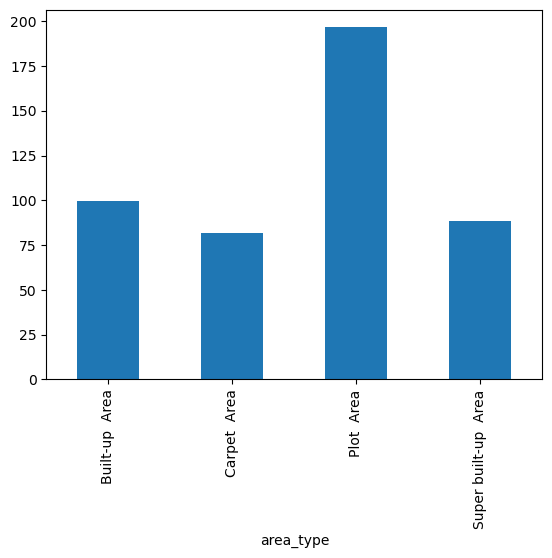

In [31]:
data.groupby(by="area_type")["price"].mean().plot.bar()

In [32]:
dummy_variables = pd.get_dummies(data['area_type'],prefix="area_type",drop_first = True)
data.drop(["area_type"],axis=1,inplace=True)
data = pd.concat([data, dummy_variables], axis = 1)
data.head()

,location,total_sqft,bath,balcony,price,availability_date,availability_month,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,19,Dec,2,0,0,1
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,23,Jul,4,0,1,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,23,Jul,3,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,23,Jul,3,0,0,1
4,Kothanur,1200.0,2.0,1.0,51.00,23,Jul,2,0,0,1


In [33]:
len(data.location.unique())

1265

<AxesSubplot:xlabel='location'>

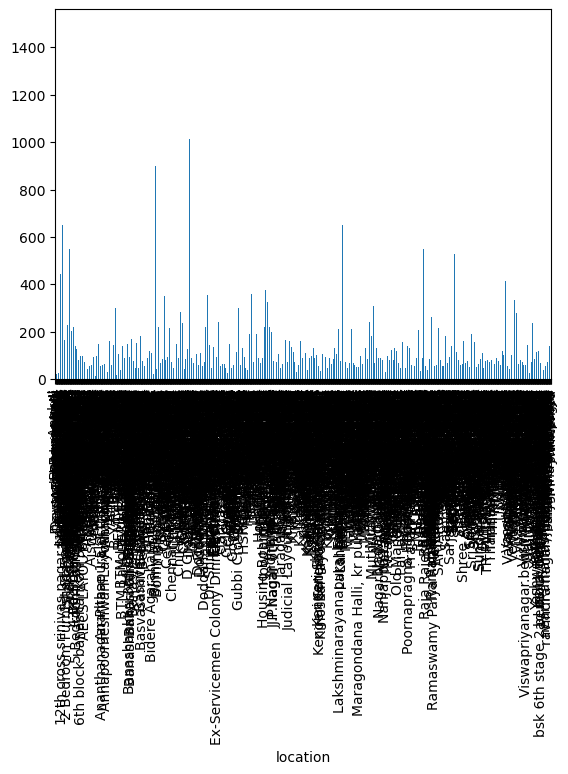

In [34]:
data.groupby(by="location")["price"].mean().plot.bar()

As we have 1200 unique values for "location", which is not helpful for our prediction. Let us drop "location".

In [35]:
data.drop(["location"],axis=1,inplace=True)

In [36]:
data.head()

,total_sqft,bath,balcony,price,availability_date,availability_month,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1056.0,2.0,1.0,39.07,19,Dec,2,0,0,1
1,2600.0,5.0,3.0,120.00,23,Jul,4,0,1,0
2,1440.0,2.0,3.0,62.00,23,Jul,3,0,0,0
3,1521.0,3.0,1.0,95.00,23,Jul,3,0,0,1
4,1200.0,2.0,1.0,51.00,23,Jul,2,0,0,1


<AxesSubplot:xlabel='availability_month'>

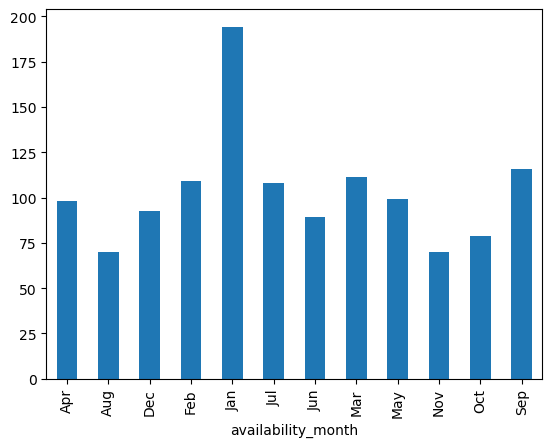

In [37]:
data.groupby(by="availability_month")["price"].mean().plot.bar()

Let us create dummy variables for "availability_month".

In [38]:
dummy_variables = pd.get_dummies(data['availability_month'],prefix="availability_month",drop_first = True)
data.drop(["availability_month"],axis=1,inplace=True)
data = pd.concat([data, dummy_variables], axis = 1)
data.head()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
0,1056.0,2.0,1.0,39.07,19,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,23,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,23,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,23,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,23,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [39]:
data.shape

(12710, 20)

Let us find if there are any outliers in continuous variables and remove them if they exists.

<AxesSubplot:xlabel='total_sqft'>

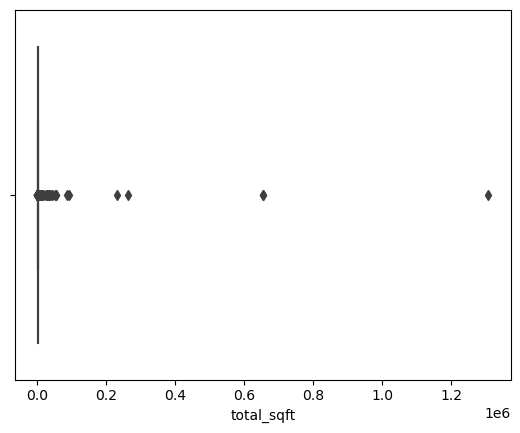

In [40]:
sns.boxplot(data["total_sqft"])

In [41]:
Q1 = data['total_sqft'].quantile(0.25)
Q3 = data['total_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data["total_sqft"] >= lower) & (data["total_sqft"] <= upper)]

<AxesSubplot:xlabel='total_sqft'>

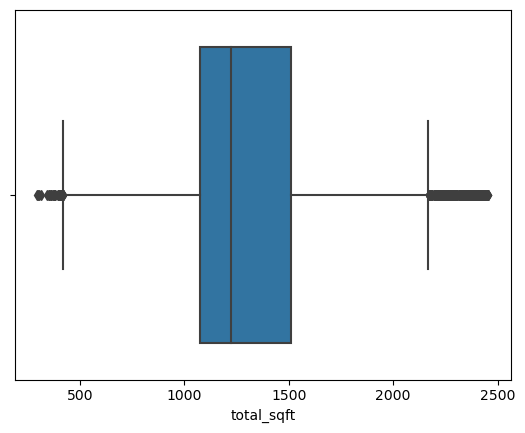

In [42]:
sns.boxplot(data["total_sqft"])

<AxesSubplot:xlabel='bath'>

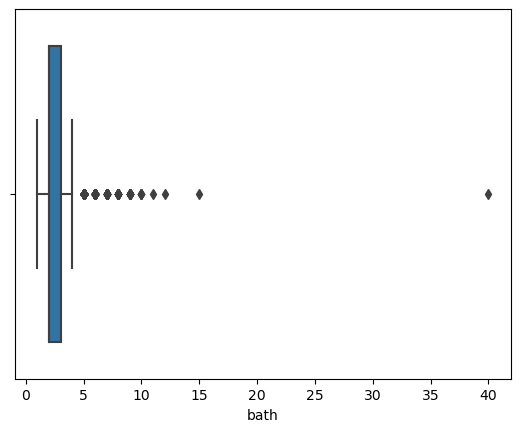

In [43]:
sns.boxplot(data["bath"])

In [44]:
Q1 = data['bath'].quantile(0.25)
Q3 = data['bath'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data["bath"] >= lower) & (data["bath"] <= upper)]

<AxesSubplot:xlabel='bath'>

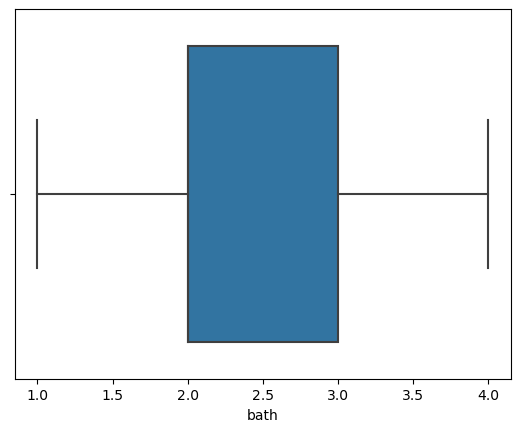

In [45]:
sns.boxplot(data["bath"])

<AxesSubplot:xlabel='balcony'>

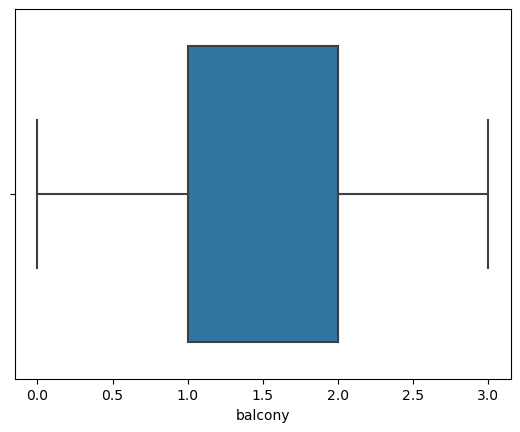

In [46]:
sns.boxplot(data["balcony"])

<AxesSubplot:xlabel='price'>

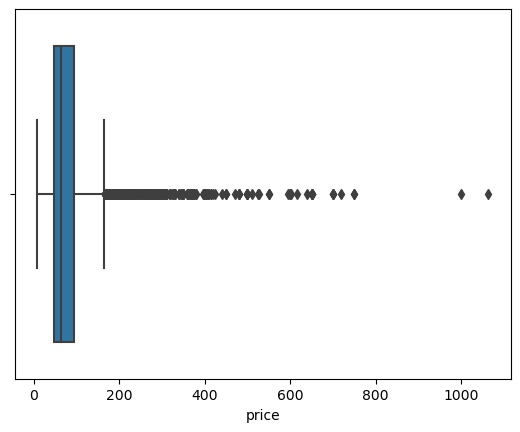

In [47]:
sns.boxplot(data["price"])

In [48]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data["price"] >= lower) & (data["price"] <= upper)]

<AxesSubplot:xlabel='price'>

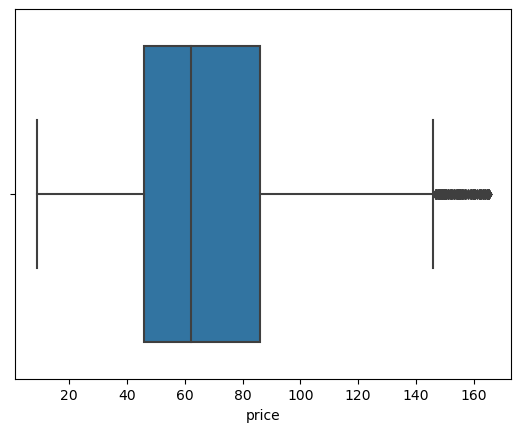

In [49]:
sns.boxplot(data["price"])

<AxesSubplot:xlabel='no_of_bedrooms'>

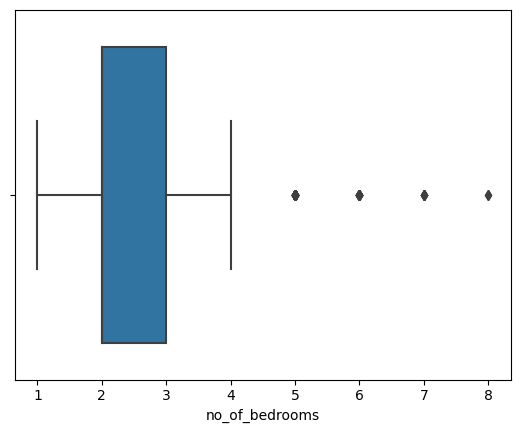

In [50]:
sns.boxplot(data["no_of_bedrooms"])

In [51]:
Q1 = data['no_of_bedrooms'].quantile(0.25)
Q3 = data['no_of_bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data["no_of_bedrooms"] >= lower) & (data["no_of_bedrooms"] <= upper)]

<AxesSubplot:xlabel='no_of_bedrooms'>

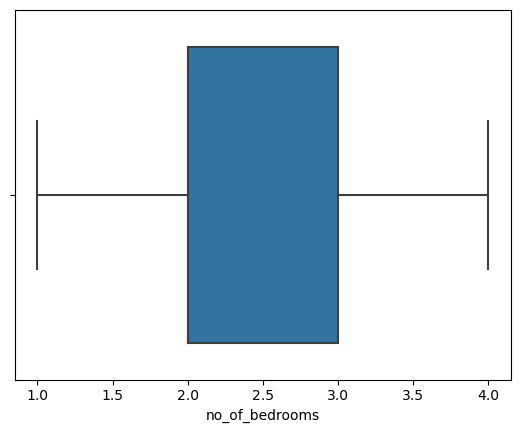

In [52]:
sns.boxplot(data["no_of_bedrooms"])

Let us now find the correlation between the continuous variables available.

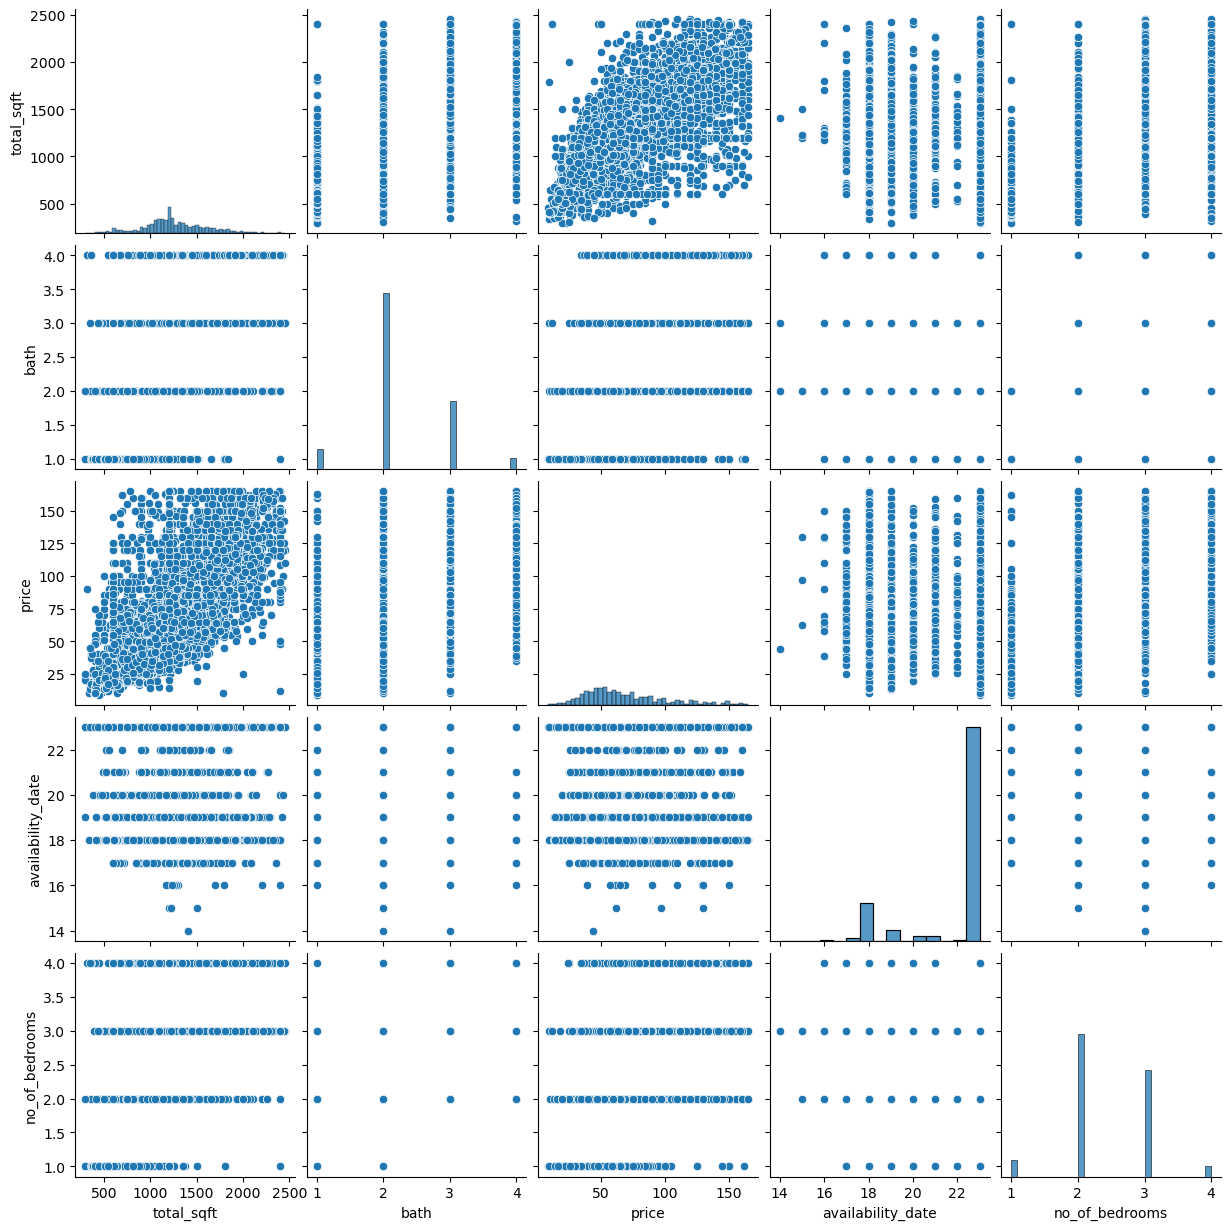

In [53]:
sns.pairplot(data[["total_sqft","bath","price","availability_date","no_of_bedrooms"]])
plt.show()

In [54]:
data.head()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
0,1056.0,2.0,1.0,39.07,19,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,23,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,23,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,23,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,23,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## Step 3: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [55]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
print(df_train.shape)
print(df_test.shape)

(7313, 20)
(3135, 20)


### Rescaling the Features 

Another important aspect to consider is feature scaling. When you have a lot
of independent variables in a model, a lot of them might be on very different scales which will lead a
model with very weird coefficients that might be difficult to interpret. So we need to scale features
because of two reasons:
1. Ease of interpretation
2. Faster convergence for gradient descent methods 

You can scale the features using two very popular method:
1. **Standardizing**: The variables are scaled in such a way that their mean is zero and standard deviation is one.   
x = x-mean(x)/sd(x)
2. **MinMax Scaling**: The variables are scaled in such a way that all the values lie between zero and one using the maximum and the minimum values in the data.   
x = x-min(x)/max(x)-min(x)


This time, we will use MinMax scaling.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
# Apply scaling to all the continuous variables
cont_vars = df_train.columns.to_list()

df_train[cont_vars] = scaler.fit_transform(df_train[cont_vars])

df_train.head()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
9453,0.435933,0.333333,0.666667,0.280513,0.444444,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,0.415042,0.333333,0.666667,0.294872,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9857,0.257196,0.333333,0.666667,0.147436,0.333333,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8660,0.419684,0.666667,0.000000,0.365385,1.000000,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6056,0.514856,0.333333,0.000000,0.266538,0.555556,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_train.describe()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
count,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000
mean,0.450721,0.418843,0.515520,0.384375,0.889451,0.467934,0.006427,0.080405,0.738138,0.022426,0.057979,0.006153,0.009299,0.794612,0.016819,0.018734,0.027075,0.006700,0.007247,0.007794
std,0.163575,0.212468,0.257999,0.201989,0.214241,0.218735,0.079915,0.271937,0.439678,0.148074,0.233720,0.078207,0.095986,0.404012,0.128603,0.135592,0.162313,0.081587,0.084828,0.087947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359331,0.333333,0.333333,0.237179,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.426648,0.333333,0.666667,0.339744,1.000000,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.545032,0.666667,0.666667,0.487179,1.000000,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [60]:
y_train = df_train.pop('price')
X_train = df_train

In [61]:
y_train.head()

9453    0.280513
1853    0.294872
9857    0.147436
8660    0.365385
6056    0.266538
Name: price, dtype: float64

In [62]:
X_train.head()

,total_sqft,bath,balcony,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
9453,0.435933,0.333333,0.666667,0.444444,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,0.415042,0.333333,0.666667,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9857,0.257196,0.333333,0.666667,0.333333,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8660,0.419684,0.666667,0.000000,1.000000,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6056,0.514856,0.333333,0.000000,0.555556,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4: Building our model

### Feature selection

Selecting the correct features is also an important aspect in building the model. But choosing to drop the correct features (that are redundant and not adding any value to the model) is quite essential.So let’s talk about the various methods for optimal feature selection:
1. Try all possible combinations (2^p models for p features)   
   1.1.Time consuming and practically unfeasible
2. Manual Feature Elimination   
   2.1 Build model    
   2.2 Drop features that are least helpful in prediction (high p-value)    
   2.3 Drop features that are redundant (using correlations, VIF)    
   2.4 Rebuild model and repeat
3. Automated Approach    
   3.1 Recursive Feature Elimination(RFE)    
   3.2 Forward/Backward/Stepwise Selection based on AIC (not covered)

Itis generally recommended that you follow a balanced approach, i.e., use a combination of automated (coarse tuning) + manual (fine tuning) selection in order to get an optimal model.

### RFE
Recursive feature elimination

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_sqft', True, 1),
 ('bath', True, 1),
 ('balcony', True, 1),
 ('availability_date', True, 1),
 ('no_of_bedrooms', True, 1),
 ('area_type_Carpet  Area', True, 1),
 ('area_type_Plot  Area', True, 1),
 ('area_type_Super built-up  Area', True, 1),
 ('availability_month_Aug', True, 1),
 ('availability_month_Dec', True, 1),
 ('availability_month_Feb', True, 1),
 ('availability_month_Jan', True, 1),
 ('availability_month_Jul', True, 1),
 ('availability_month_Jun', True, 1),
 ('availability_month_Mar', True, 1),
 ('availability_month_May', True, 1),
 ('availability_month_Nov', True, 1),
 ('availability_month_Oct', True, 1),
 ('availability_month_Sep', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['total_sqft', 'bath', 'balcony', 'availability_date', 'no_of_bedrooms',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'availability_month_Aug',
       'availability_month_Dec', 'availability_month_Feb',
       'availability_month_Jan', 'availability_month_Jul',
       'availability_month_Jun', 'availability_month_Mar',
       'availability_month_May', 'availability_month_Nov',
       'availability_month_Oct', 'availability_month_Sep'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [68]:
import statsmodels.api as sm 

In [69]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     446.1
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:31   Log-Likelihood:                 4140.8
No. Observations:                7313   AIC:                            -8242.
Df Residuals:                    7293   BIC:                            -8104.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [70]:
data.shape

(10448, 20)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,71.94
12,availability_month_Jul,61.50
0,total_sqft,17.27
4,no_of_bedrooms,16.03
1,bath,14.37
2,balcony,6.21
7,area_type_Super built-up Area,5.09
9,availability_month_Dec,2.57
6,area_type_Plot Area,1.64
15,availability_month_May,1.57


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `area_type_Super built-up Area` as it has a high p-value.

In [73]:
X_train_rfe = X_train_rfe.drop(["area_type_Super built-up  Area"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     470.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:32   Log-Likelihood:                 4140.8
No. Observations:                7313   AIC:                            -8244.
Df Residuals:                    7294   BIC:                            -8112.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [74]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,69.27
11,availability_month_Jul,61.45
0,total_sqft,17.07
4,no_of_bedrooms,16.02
1,bath,14.36
2,balcony,6.11
8,availability_month_Dec,2.54
14,availability_month_May,1.53
7,availability_month_Aug,1.44
13,availability_month_Mar,1.43


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Dec` as it has a high p-value.

In [75]:
X_train_rfe = X_train_rfe.drop(["availability_month_Dec"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     498.7
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:32   Log-Likelihood:                 4140.7
No. Observations:                7313   AIC:                            -8245.
Df Residuals:                    7295   BIC:                            -8121.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [76]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,38.07
10,availability_month_Jul,26.50
0,total_sqft,16.82
4,no_of_bedrooms,16.01
1,bath,14.36
2,balcony,6.11
6,area_type_Plot Area,1.37
13,availability_month_May,1.22
7,availability_month_Aug,1.18
12,availability_month_Mar,1.17


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Jan` as it has a high p-value.

In [77]:
X_train_rfe = X_train_rfe.drop(["availability_month_Jan"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     529.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:32   Log-Likelihood:                 4140.5
No. Observations:                7313   AIC:                            -8247.
Df Residuals:                    7296   BIC:                            -8130.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [78]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,36.31
9,availability_month_Jul,24.40
0,total_sqft,16.80
4,no_of_bedrooms,16.01
1,bath,14.36
2,balcony,6.10
6,area_type_Plot Area,1.37
12,availability_month_May,1.20
7,availability_month_Aug,1.16
11,availability_month_Mar,1.16


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Nov` as it has a high p-value.

In [79]:
X_train_rfe = X_train_rfe.drop(["availability_month_Nov"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     565.2
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:32   Log-Likelihood:                 4140.2
No. Observations:                7313   AIC:                            -8248.
Df Residuals:                    7297   BIC:                            -8138.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [80]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,35.64
9,availability_month_Jul,23.53
0,total_sqft,16.77
4,no_of_bedrooms,16.01
1,bath,14.35
2,balcony,6.10
6,area_type_Plot Area,1.37
12,availability_month_May,1.19
7,availability_month_Aug,1.16
11,availability_month_Mar,1.15


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_May` as it has a high p-value.

In [81]:
X_train_rfe = X_train_rfe.drop(["availability_month_May"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     605.5
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:33   Log-Likelihood:                 4139.8
No. Observations:                7313   AIC:                            -8250.
Df Residuals:                    7298   BIC:                            -8146.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [82]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,34.02
9,availability_month_Jul,20.94
0,total_sqft,16.71
4,no_of_bedrooms,16.01
1,bath,14.35
2,balcony,6.08
6,area_type_Plot Area,1.37
7,availability_month_Aug,1.13
11,availability_month_Mar,1.13
10,availability_month_Jun,1.12


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Oct` as it has a high p-value.

In [83]:
X_train_rfe = X_train_rfe.drop(["availability_month_Oct"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     651.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:33   Log-Likelihood:                 4139.1
No. Observations:                7313   AIC:                            -8250.
Df Residuals:                    7299   BIC:                            -8154.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [84]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,33.63
9,availability_month_Jul,20.33
0,total_sqft,16.70
4,no_of_bedrooms,16.00
1,bath,14.35
2,balcony,6.08
6,area_type_Plot Area,1.37
7,availability_month_Aug,1.13
10,availability_month_Jun,1.12
11,availability_month_Mar,1.12


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Sep` as it has a high p-value.

In [85]:
X_train_rfe = X_train_rfe.drop(["availability_month_Sep"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     706.0
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:33   Log-Likelihood:                 4138.2
No. Observations:                7313   AIC:                            -8250.
Df Residuals:                    7300   BIC:                            -8161.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [86]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,33.17
9,availability_month_Jul,19.69
0,total_sqft,16.67
4,no_of_bedrooms,16.00
1,bath,14.35
2,balcony,6.08
6,area_type_Plot Area,1.36
7,availability_month_Aug,1.12
11,availability_month_Mar,1.12
10,availability_month_Jun,1.11


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_month_Aug` as it has a high p-value.

In [87]:
X_train_rfe = X_train_rfe.drop(["availability_month_Aug"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     769.8
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:33   Log-Likelihood:                 4136.8
No. Observations:                7313   AIC:                            -8250.
Df Residuals:                    7301   BIC:                            -8167.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [88]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,availability_date,32.13
8,availability_month_Jul,18.21
0,total_sqft,16.63
4,no_of_bedrooms,16.00
1,bath,14.33
2,balcony,6.06
6,area_type_Plot Area,1.36
9,availability_month_Jun,1.10
10,availability_month_Mar,1.10
7,availability_month_Feb,1.03


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `availability_date` as it has a high VIF.

In [89]:
X_train_rfe = X_train_rfe.drop(["availability_date"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     839.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:34   Log-Likelihood:                 4120.5
No. Observations:                7313   AIC:                            -8219.
Df Residuals:                    7302   BIC:                            -8143.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [90]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,no_of_bedrooms,15.93
0,total_sqft,14.68
1,bath,14.31
2,balcony,5.76
7,availability_month_Jul,4.39
5,area_type_Plot Area,1.35
9,availability_month_Mar,1.07
8,availability_month_Jun,1.06
6,availability_month_Feb,1.03
4,area_type_Carpet Area,1.01


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `no_of_bedrooms` as it has a high VIF.

In [91]:
X_train_rfe = X_train_rfe.drop(["no_of_bedrooms"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     931.1
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:34   Log-Likelihood:                 4115.8
No. Observations:                7313   AIC:                            -8212.
Df Residuals:                    7303   BIC:                            -8143.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [92]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_sqft,12.73
1,bath,9.62
2,balcony,5.73
6,availability_month_Jul,4.37
4,area_type_Plot Area,1.29
8,availability_month_Mar,1.07
7,availability_month_Jun,1.06
5,availability_month_Feb,1.03
3,area_type_Carpet Area,1.01


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `bath` as it has a high VIF.

In [93]:
X_train_rfe = X_train_rfe.drop(["bath"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     985.6
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:34   Log-Likelihood:                 3998.3
No. Observations:                7313   AIC:                            -7979.
Df Residuals:                    7304   BIC:                            -7917.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [94]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_sqft,6.39
1,balcony,5.55
5,availability_month_Jul,4.36
3,area_type_Plot Area,1.11
7,availability_month_Mar,1.07
6,availability_month_Jun,1.06
4,availability_month_Feb,1.03
2,area_type_Carpet Area,1.01


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `balcony` as it has a high VIF.

In [95]:
X_train_rfe = X_train_rfe.drop(["balcony"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:02:18   Log-Likelihood:                 3998.2
No. Observations:                7313   AIC:                            -7980.
Df Residuals:                    7305   BIC:                            -7925.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [96]:
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_sqft,3.96
4,availability_month_Jul,3.91
2,area_type_Plot Area,1.09
6,availability_month_Mar,1.07
5,availability_month_Jun,1.06
3,availability_month_Feb,1.03
1,area_type_Carpet Area,1.01


## Step 5: Analysing the residuals

### Let’s take a look at what the assumptions of simple linear regression were:
1. Linear relationship between X and Y
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

#### Let us check if Error terms are normally distributed

In [97]:
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

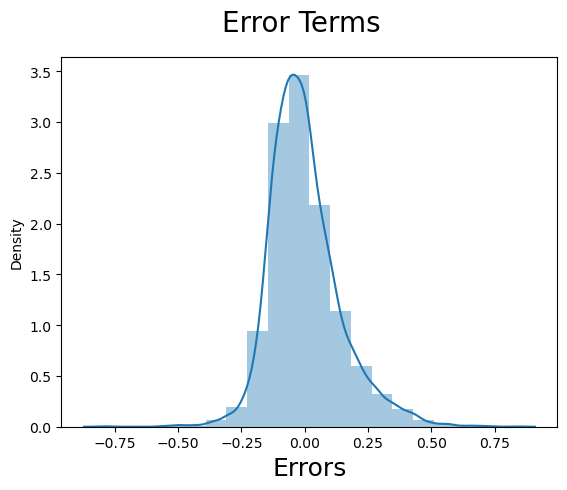

In [98]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above graph, we can conclude the error terms are **normally distributed with mean 0**.

#### Let us check if Error terms are independent of each other

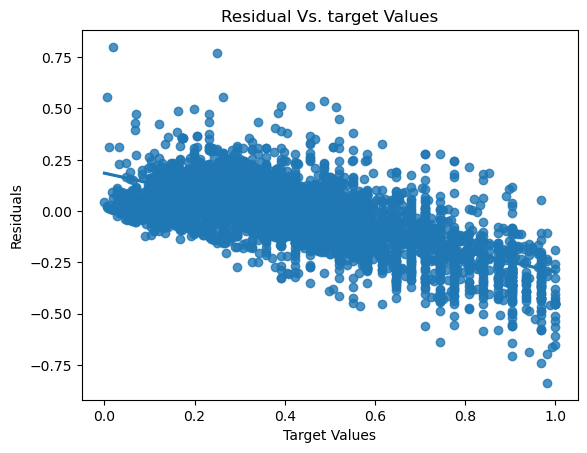

In [99]:
sns.regplot(x=y_train, y=y_train_pred-y_train)
plt.title('Residual Vs. target Values')
plt.xlabel('Target Values')
plt.ylabel('Residuals')
plt.show()


From the above graph, we can say error terms are independent and does not follow any pattern.

#### Let us check if Error terms have constant variance (homoscedasticity)

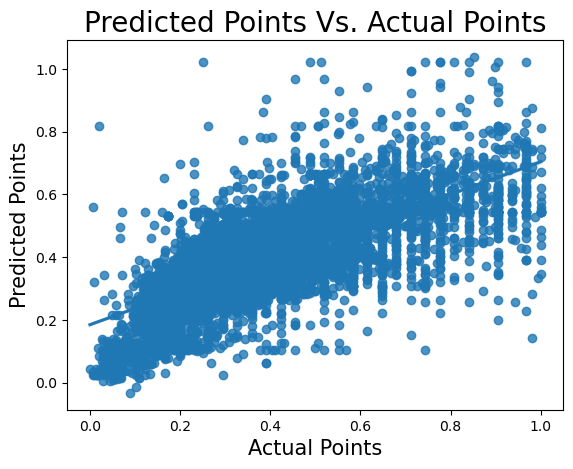

In [100]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph we can say error terms follow homoscadasticity.

## Step 6:  Making Predictions Using the Final Model

#### Applying the scaling on the test sets    
Here we have to use the scalar object which is fit for the train data.

In [101]:
df_test[cont_vars] = scaler.transform(df_test[cont_vars])
df_test.head()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
5931,0.536212,0.333333,0.666667,0.278397,0.444444,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7562,0.405757,0.333333,1.000000,0.262821,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9489,0.553853,0.333333,0.000000,0.589744,1.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8661,0.166202,0.000000,0.333333,0.185897,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5579,0.382544,0.333333,1.000000,0.282051,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df_test.describe()

,total_sqft,bath,balcony,price,availability_date,no_of_bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_month_Aug,availability_month_Dec,availability_month_Feb,availability_month_Jan,availability_month_Jul,availability_month_Jun,availability_month_Mar,availability_month_May,availability_month_Nov,availability_month_Oct,availability_month_Sep
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.00000
mean,0.451145,0.415630,0.513131,0.385309,0.889208,0.464221,0.007337,0.076874,0.733014,0.020415,0.061563,0.004147,0.013078,0.794577,0.015311,0.019458,0.026475,0.007337,0.007974,0.00638
std,0.167268,0.215254,0.260556,0.205041,0.214345,0.220198,0.085352,0.266434,0.442455,0.141437,0.240398,0.064272,0.113628,0.404075,0.122806,0.138149,0.160569,0.085352,0.088957,0.07963
min,0.001857,0.000000,0.000000,0.006410,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.355850,0.333333,0.333333,0.230769,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.424327,0.333333,0.666667,0.334615,1.000000,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.547354,0.666667,0.666667,0.493590,1.000000,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [103]:
y_test = df_test.pop('price')
X_test = df_test

In [104]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe = X_train_rfe.drop(["const"],axis=1)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,total_sqft,area_type_Carpet Area,area_type_Plot Area,availability_month_Feb,availability_month_Jul,availability_month_Jun,availability_month_Mar
5931,1.0,0.536212,0.0,0.0,0.0,0.0,0.0,0.0
7562,1.0,0.405757,0.0,0.0,0.0,1.0,0.0,0.0
9489,1.0,0.553853,1.0,0.0,0.0,1.0,0.0,0.0
8661,1.0,0.166202,0.0,0.0,0.0,1.0,0.0,0.0
5579,1.0,0.382544,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [106]:
y_test_pred.head()

5931    0.426599
7562    0.330391
9489    0.512859
8661    0.125299
5579    0.310517
dtype: float64

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

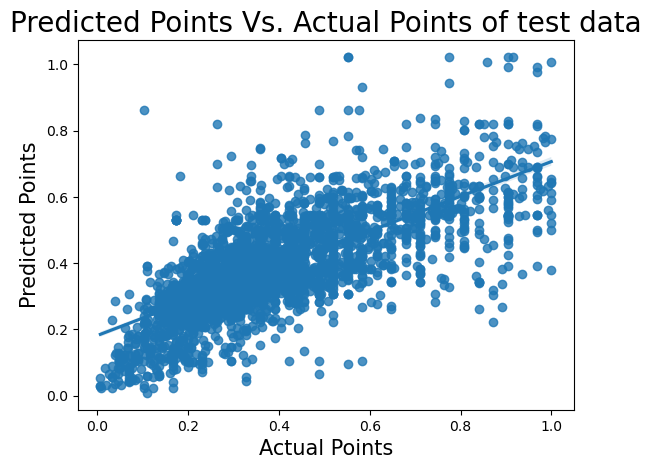

In [107]:
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Points Vs. Actual Points of test data', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

Let us find the R-square score on the test data.

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.5296142398436485

**price = -0.0325 + 0.8561 X total_sqft + 0.0557 X area_type_Carpet  Area + 0.2027 X area_type_Plot  Area + 0.0674 X availability_month_Feb + 0.0155 X availability_month_Jul + 0.0406 X availability_month_Jun + 0.0486 X availability_month_Mar**